**Importing Libraries**

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading data into Environment**

In [2]:
data = pd.read_csv('/content/test_loan.csv')

**Preprocessing**

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


**1.Missing value handling**

In [5]:
#filling missing values with mode
mode_gender = data['Gender'].mode()[0]
data['Gender'].fillna(value=mode_gender, inplace=True)

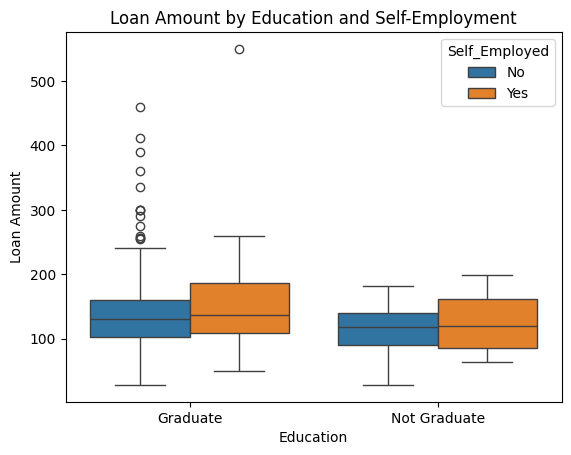

In [6]:
#Boxplot Comapring Loan Amount by Education and Self-Employment
sns.boxplot(x="Education", y="LoanAmount", hue="Self_Employed", data=data)

plt.title("Loan Amount by Education and Self-Employment")
plt.xlabel("Education")
plt.ylabel("Loan Amount")

plt.show()

In [7]:
#filling missing values with mode
mode_Self_Employed = data['Self_Employed'].mode()[0]
data['Self_Employed'].fillna(value=mode_Self_Employed, inplace=True)

In [8]:
data['Dependents'].value_counts(normalize=True)

0     0.560224
2     0.165266
1     0.162465
3+    0.112045
Name: Dependents, dtype: float64

In [58]:
# Pivot table for  LoadID , Dependents and Married
table1 = data.pivot_table(values='Loan_ID',index='Dependents', columns='Married', aggfunc=len)
table1

Married,0,1
Dependents,,
0,110,95
1,13,46
2,6,55
3,5,37


In [10]:
# function to fill Dependents missing values with 0 if not married and 1, 2, or 3+ if married
import random
def fage3(x):
    if x['Married'] == 'No':
        return 0
    else:
        return random.choice(['1', '2', '3+'])

data['Dependents'].fillna(data[data['Dependents'].isnull()].apply(fage3,axis=1), inplace=True)

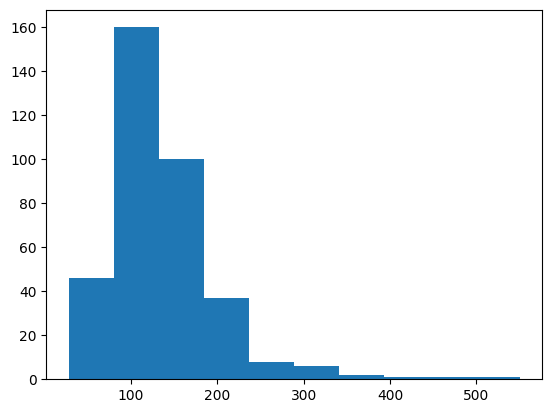

In [11]:
plt.hist(data['LoanAmount'])
plt.show()

In [13]:
# filling missing values in loan amount with median

data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)


In [15]:
data['Loan_Amount_Term'].unique()

array([360., 240., 180.,  nan,  60., 480.,  84.,  12., 300., 350.,  36.,
       120.,   6.])

In [16]:
data['Loan_Amount_Term'].nunique()

12

In [17]:
data['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [18]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)

In [21]:
data['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [23]:
data['Credit_History'].fillna(data['Credit_History'].median(), inplace=True)

In [28]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

**Cheking  for Outliers**

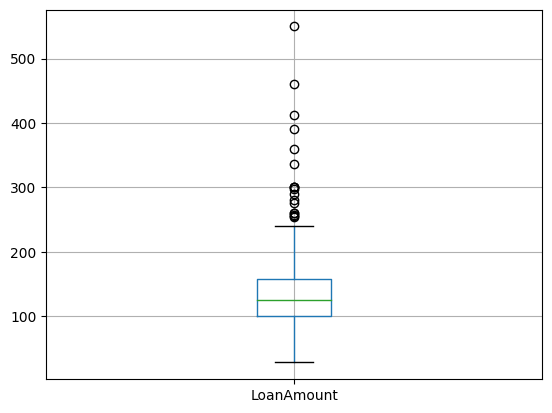

In [12]:
data.boxplot(column='LoanAmount')
plt.show()

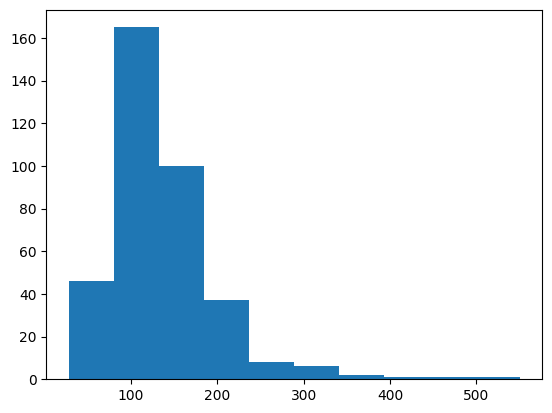

In [40]:
plt.hist(data['LoanAmount'])
plt.show()

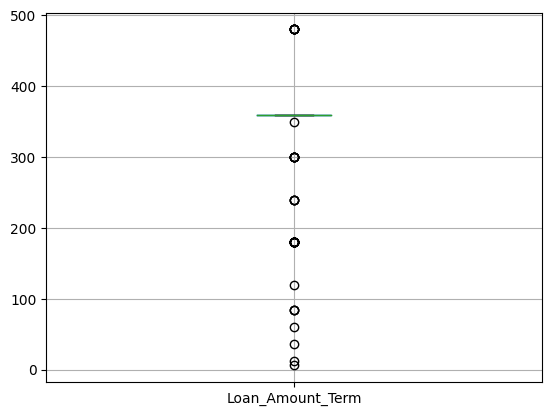

In [27]:
data.boxplot(column='Loan_Amount_Term')
plt.show()

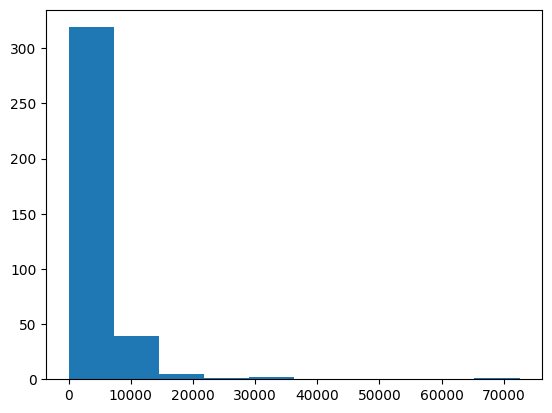

In [48]:
plt.hist(data['ApplicantIncome'])
plt.show()

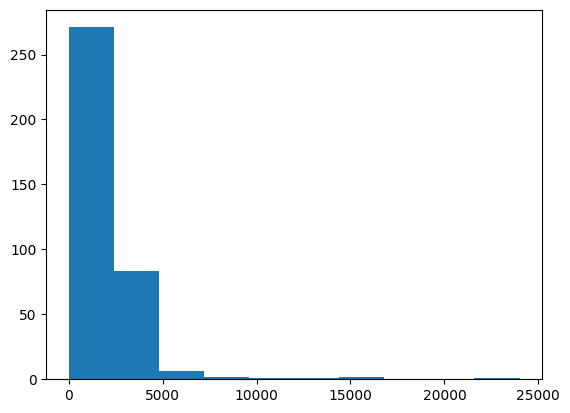

In [49]:
plt.hist(data['CoapplicantIncome'])
plt.show()

In [29]:
#Creating an extra column called TotalIncome
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

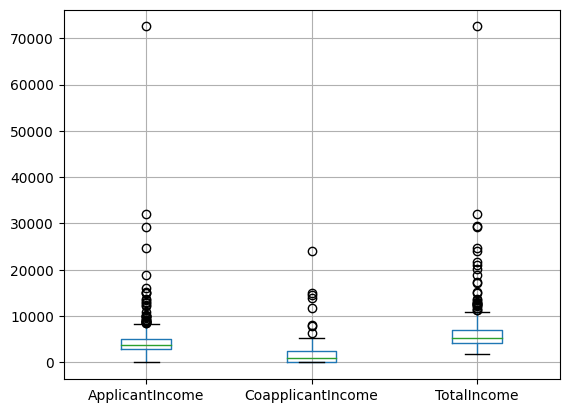

In [30]:
# Boxplot for  ApplicantIncome    CoapplicantIncome  and TotalIncome

data.boxplot(column=['ApplicantIncome', 'CoapplicantIncome', 'TotalIncome'])
plt.show()


In [32]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276


**Outlier Handling**

In [31]:
#Outlier Handling For TotalIncome
q1 = data['TotalIncome'].quantile(0.25)
q2 = data['TotalIncome'].quantile(0.5)
q3 = data['TotalIncome'].quantile(0.75)

In [33]:
iqr=q3-q1

In [34]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [35]:
print(up_lim,low_lim)

11216.0 -80.0


In [36]:
# Imputer function
def limt_imputer(value):
  if value>up_lim:
    return up_lim
  if value<low_lim:
    return low_lim
  else:
       return value

In [37]:
#applying the imputer function
data['TotalIncome']=data['TotalIncome'].apply(limt_imputer)

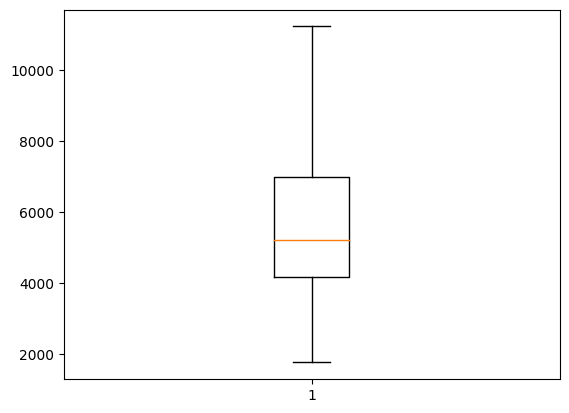

In [38]:
#Checking if above step worked
plt.boxplot(data['TotalIncome'])
plt.show()

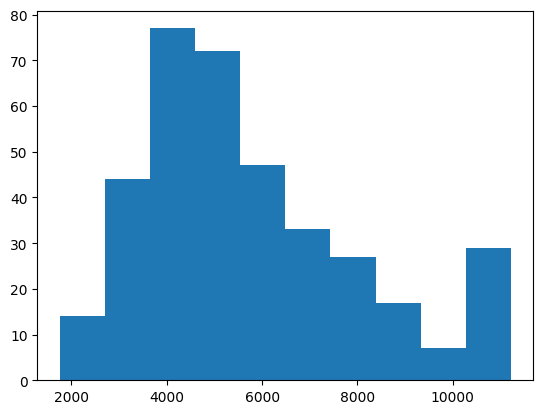

In [39]:
plt.hist(data['TotalIncome'])
plt.show()

In [41]:
# replace '3+' with 3 and change the datatype into integer
data['Dependents'].replace(['3+'], 3, inplace=True)
data['Dependents'] = data['Dependents'].astype(int)

**Encoding**

In [45]:
# encoding categorical variables as numerical values (e.g. male is 1)
from sklearn.preprocessing import LabelEncoder

variableMod = ['Gender', 'Married','Dependents', 'Education', 'Self_Employed', 'Property_Area']
le = LabelEncoder()

for i in variableMod:
    data[i] = le.fit_transform(data[i])

data.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
TotalIncome          float64
dtype: object

**Scaling**

In [50]:
#Applying MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term', 'TotalIncome']] = scaler.fit_transform(data[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'TotalIncome']].values)

In [53]:
#Applying Robust Scaler
from sklearn.preprocessing import RobustScaler
sc=RobustScaler()
data[['LoanAmount']]=sc.fit_transform(data[['LoanAmount']].values)

<Axes: xlabel='LoanAmount', ylabel='Count'>

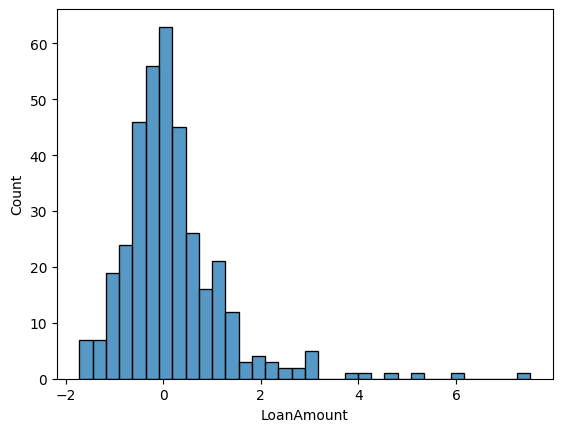

In [55]:
#Checking whether Scaling worked
sns.histplot(data['LoanAmount'])

In [56]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,LP001015,1,1,0,0,0,0.078865,0.000000,-0.265487,0.746835,1.0,2,0.418782
1,LP001022,1,1,1,0,0,0.042411,0.062500,0.017699,0.746835,1.0,2,0.297800
2,LP001031,1,1,2,0,0,0.068938,0.075000,1.469027,0.746835,1.0,2,0.532995
3,LP001035,1,1,2,0,0,0.032263,0.106083,-0.442478,0.746835,1.0,2,0.330584
4,LP001051,1,0,0,1,0,0.045168,0.000000,-0.831858,0.746835,1.0,2,0.160321
